# Exercícios para entregar

Resolva o problema abaixo usando as três técnicas aprendidas na aula `06_views_e_subqueries`:

    A. Select from select
    B. WITH
    C. VIEW

1. Quantos vendedores tiveram menos de 300 pedidos e média superior a 700 unidades monetárias por pedido?


In [7]:
# Primeira Parte
# Criar View
# Filtra todos os que tiveram menos de 300 pedidos
# numero_vendas | vendedor | valor_total

    CREATE VIEW vendas_view AS 
    (
        SELECT 
            count(orders.employee_id) AS numero_vendas,
            orders.employee_id AS vendedor,
            SUM(order_details.unit_price * order_details.quantity * (1-order_details.discount)) AS valor_total    
        FROM 
            order_details
        INNER JOIN orders ON 
            orders.order_id = order_details.order_id
        GROUP BY 
            orders.employee_id
        HAVING 
            count(orders.employee_id) < 300
        ORDER BY 
            employee_id
    )

In [5]:
# Segunda parte

    WITH analise as (
        SELECT 
            vendedor,
            valor_total/numero_vendas AS media
        FROM vendas_view
    )

    SELECT 
        vendedor,
        employees.last_name,
        employees.first_name
    FROM 
        analise
    INNER JOIN 
        employees ON employees.employee_id = analise.vendedor
    WHERE 
        media > 700;

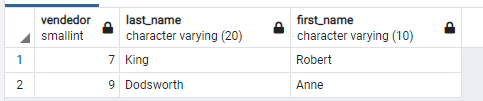